# Kaggle House Price_김혜빈

https://www.kaggle.com/c/house-prices-advanced-regression-techniques
<br>
<br>
* 'y' -> 'SalePrice'
* Mertic : 'RMSE'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Kaggle_House_Price.csv' Github에서 읽어오기

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Kaggle_House_Price.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Data Preprocessing

> ## 1) 결측치 확인



In [ ]:
DF.shape

(1460, 81)

In [ ]:
isnull_series = DF.isnull().sum()

isnull_series[isnull_series > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

> ## 2) Drop Columns

* 결측치가 많은 컬럼 제거

In [ ]:
DF.drop(['Id', 'PoolQC' , 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
         axis = 1,
         inplace = True)

* '숫자형' Null 컬럼 평균값 대체

In [ ]:
DF.fillna(DF.mean(),inplace = True)

In [ ]:
null_column_count = DF.isnull().sum()[DF.isnull().sum() > 0]
DF.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

> ## 3) Encoding

* get_dummies( )

In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', DF.shape)
DF_OHE = pd.get_dummies(DF)
print('get_dummies() 수행 후 데이터 Shape:', DF_OHE.shape)
# 문자형데이터를 인코딩하며 차원이 늘어난다.

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)


* 처리 결과 확인

In [ ]:
DF_OHE.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 271, dtype: int64

> ## 4) 'SalePrice' 분포

* 정규분포 형태가 아님

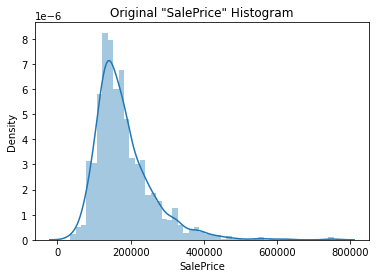

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original "SalePrice" Histogram')
sns.distplot(DF_OHE['SalePrice'])
plt.show()

* Log Transformed
 - 정규분포 형태 변환

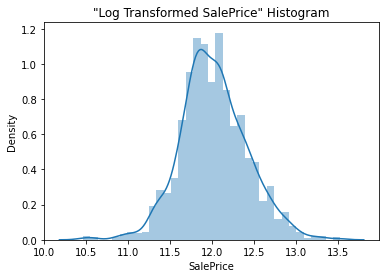

In [ ]:
import numpy as np

plt.title('"Log Transformed SalePrice" Histogram')
log_SalePrice = np.log1p(DF_OHE['SalePrice'])
sns.distplot(log_SalePrice)

* 적용

In [ ]:
# original_SalePrice = DF_OHE['SalePrice']

DF_OHE['SalePrice'] = np.log1p(DF_OHE['SalePrice'])

* Log 변환

In [ ]:
np.log1p(40000)

10.596659732783579

* 복원

In [ ]:
np.expm1(np.log1p(40000))

40000.0

> ## 5) train_test_split( )

In [ ]:
from sklearn.model_selection import train_test_split

X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 270), (1022,), (438, 270), (438,))

# 2. EDA

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corrDF = DF_OHE.corr(method = 'pearson')
top_corr = corrDF[abs(corrDF['SalePrice'])>= 0.5]
top_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185,-0.132109,0.171854,-0.064666,...,-0.051536,-0.001881,0.174427,-0.051079,0.357994,-0.025734,0.198299,-0.100601,-0.337227,0.394996,0.218673,-0.422479,0.029562,-0.124380,0.043769,-0.025141,0.256610,-0.016055,-0.144050,-0.011987,-0.048019,0.300819,-0.214103,-0.076757,0.227129,-0.065259,0.034147,0.037524,-0.037305,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570,-0.129736,0.237645,-0.089183,...,-0.062995,-0.005435,0.174034,-0.038512,0.472229,-0.043454,0.201547,-0.056346,-0.487130,0.393237,0.314221,-0.523233,-0.061521,-0.291702,-0.049757,-0.079054,0.383603,-0.026702,-0.235862,-0.024465,-0.134279,0.350350,-0.387961,-0.180702,0.433060,-0.065414,-0.028675,0.036472,-0.043304,0.002975,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608,-0.107299,0.208816,-0.065939,...,-0.036198,-0.007441,0.090471,-0.047308,0.269221,-0.039664,0.184043,-0.065208,-0.310921,0.328519,0.197788,-0.414376,-0.034883,-0.133364,0.019370,-0.076658,0.175079,-0.050007,-0.125903,-0.032560,-0.090353,0.193803,-0.133838,-0.135676,0.187277,-0.149424,-0.009183,0.028954,-0.017296,0.011175,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.311700,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134,-0.054352,-0.032689,-0.055128,...,0.009534,-0.002175,0.061682,0.036312,0.380596,-0.038615,-0.031859,-0.062612,-0.307182,0.255437,0.168562,-0.302520,-0.015910,-0.088652,-0.004968,-0.014599,0.179447,-0.021572,-0.100469,-0.015900,-0.033033,0.195

In [44]:
top_corr_in = corrDF.index[abs(corrDF['SalePrice'])>= 0.5]
top_corr_in

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'KitchenQual_TA'],
      dtype='object')

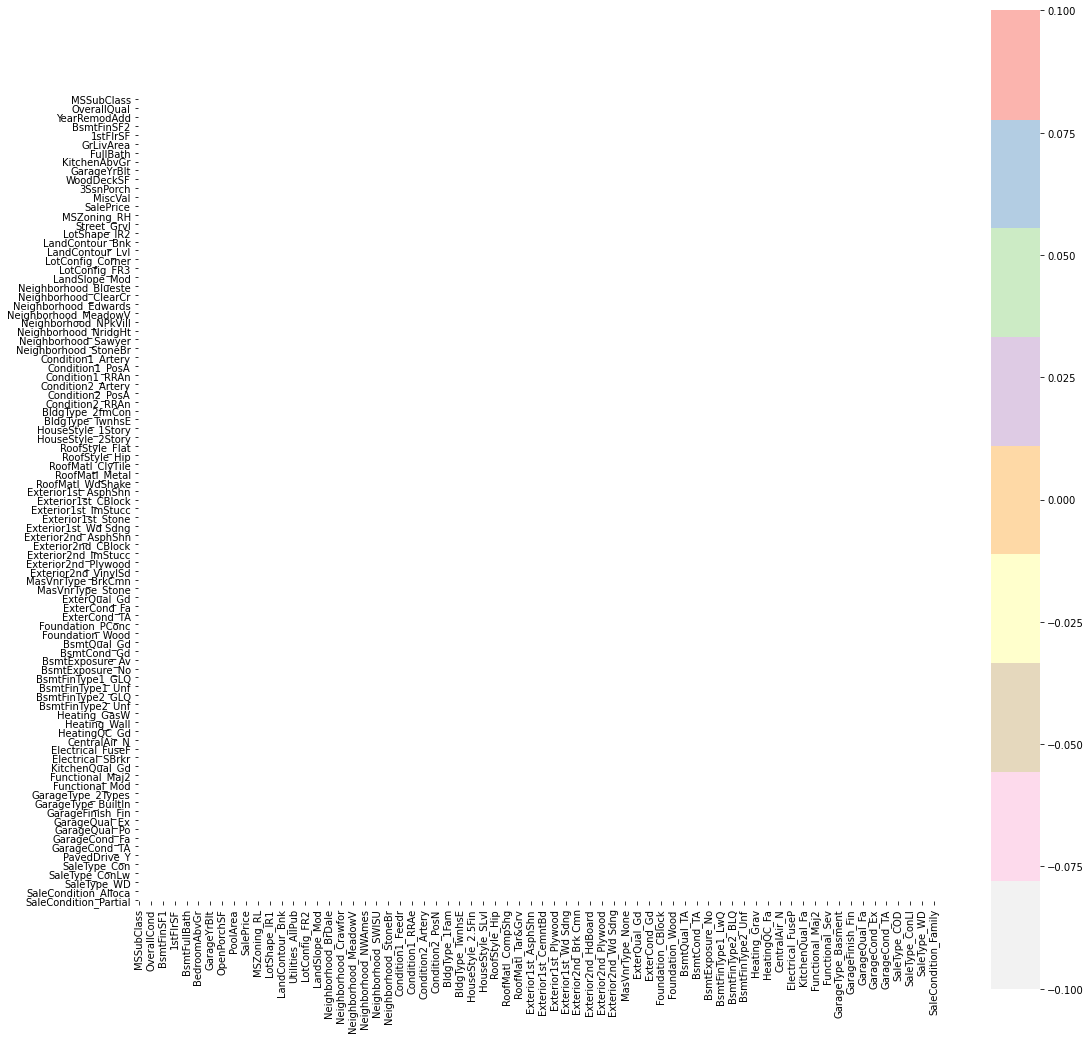

CPU times: user 21.1 s, sys: 543 ms, total: 21.7 s
Wall time: 21.6 s


In [30]:
%%time
plt.figure(figsize = (18, 18
                      ))
sns.heatmap(DF_OHE[top_corr].corr(),
            cbar = True,   # colorbar 유무
            annot = True,  # 숫자출력
            annot_kws = {'size' : 15},   # 글씨 크기
            fmt = '.2f',    # 표기 숫자 소수점 2자리까지 출력
            square = True,  # cell이 정사각형 모양
            cmap = 'Pastel1_r') 
plt.show()

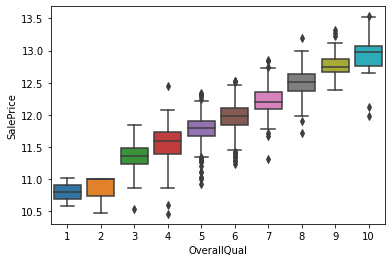

In [36]:
# overallqual와 saleprice = 0.817
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = DF_OHE)
# 집의 가치에 따른 가격 : 집의 가치가 올라가면 가격도 올라간다.
# 이상치도 존재한다.

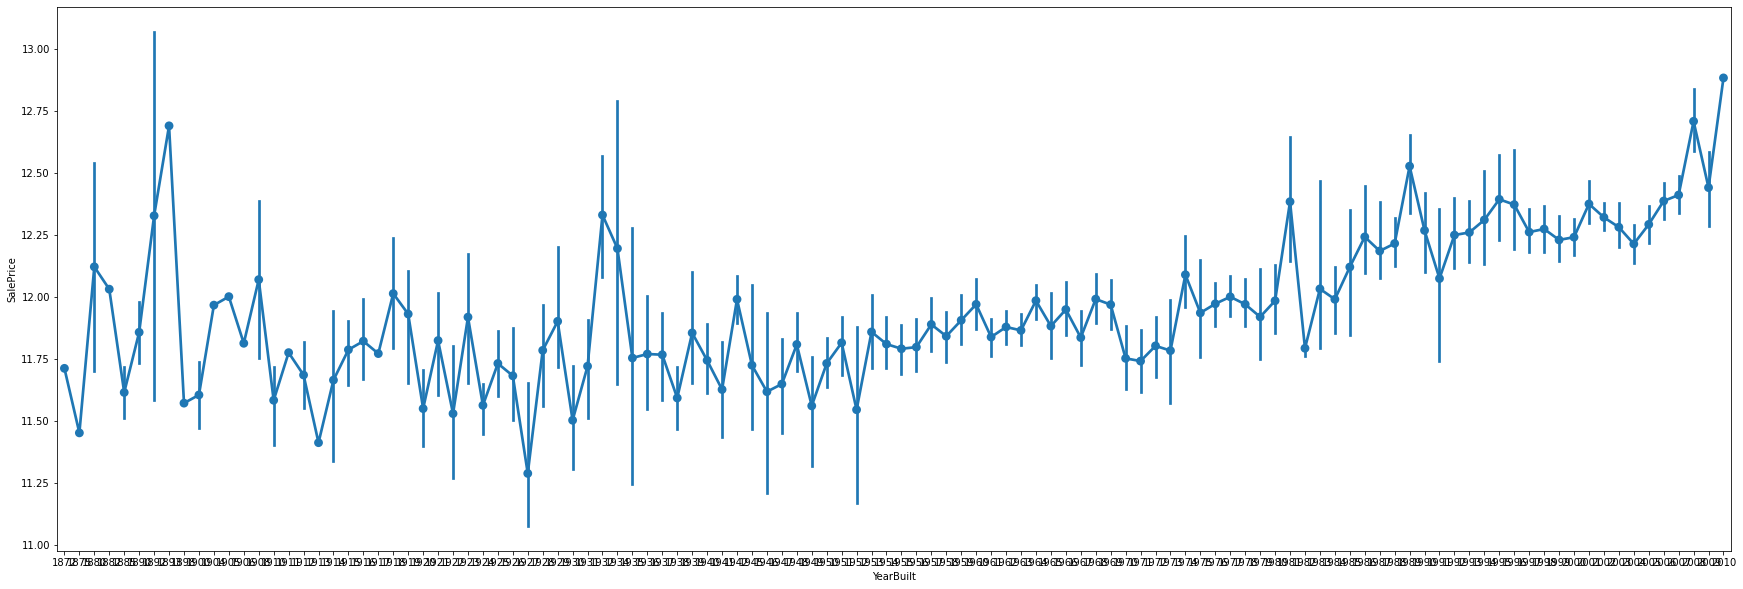

In [39]:
# yearbuilt와 saleprice = 0.587
plt.figure(figsize= (30, 10))
sns.pointplot(x = 'YearBuilt', y = 'SalePrice', data = DF_OHE)

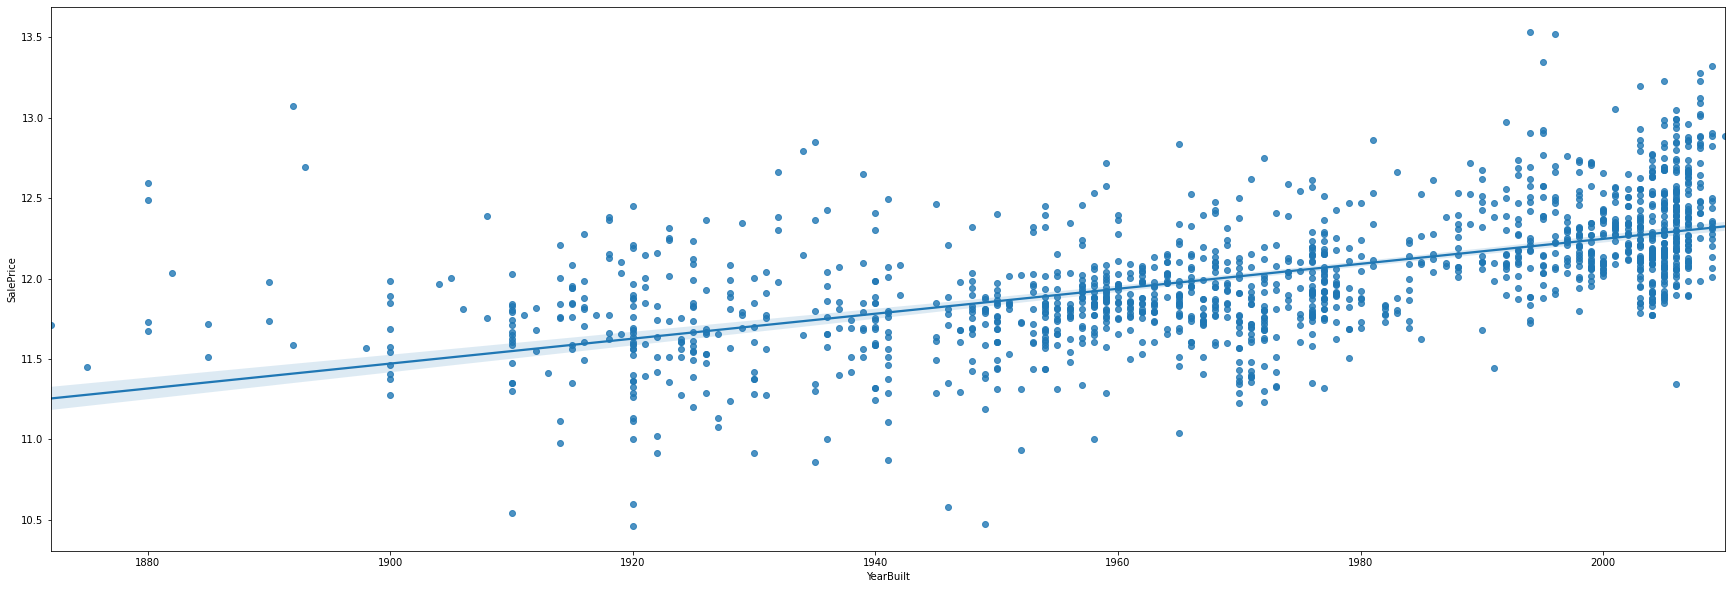

In [42]:
plt.figure(figsize= (30, 10))
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = DF_OHE)
# 집이 지어진 년도에 따른 가격 : 2000년 이후에 우상향 선형이 약간 보이지만 뚜렷한 선형은 보이지 않는다.

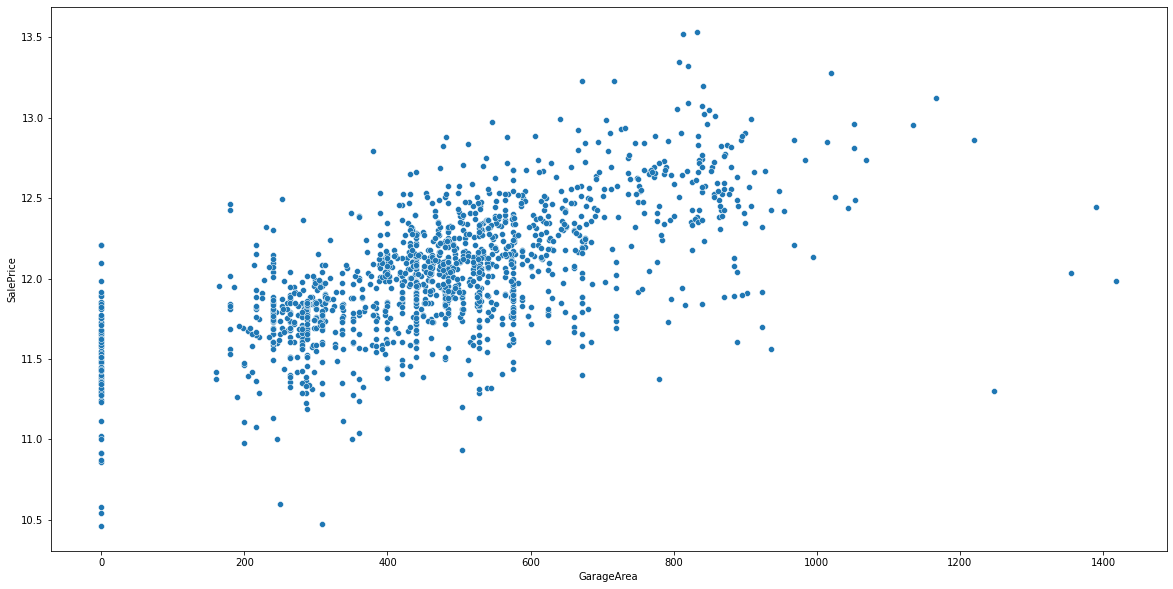

In [50]:
# garagearea와 saleprice = 0.651
plt.figure(figsize= (20, 10))
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = DF_OHE)
# 차고 넓이가 넓을 수록 집 가격이 비싼 경향이 있다. 

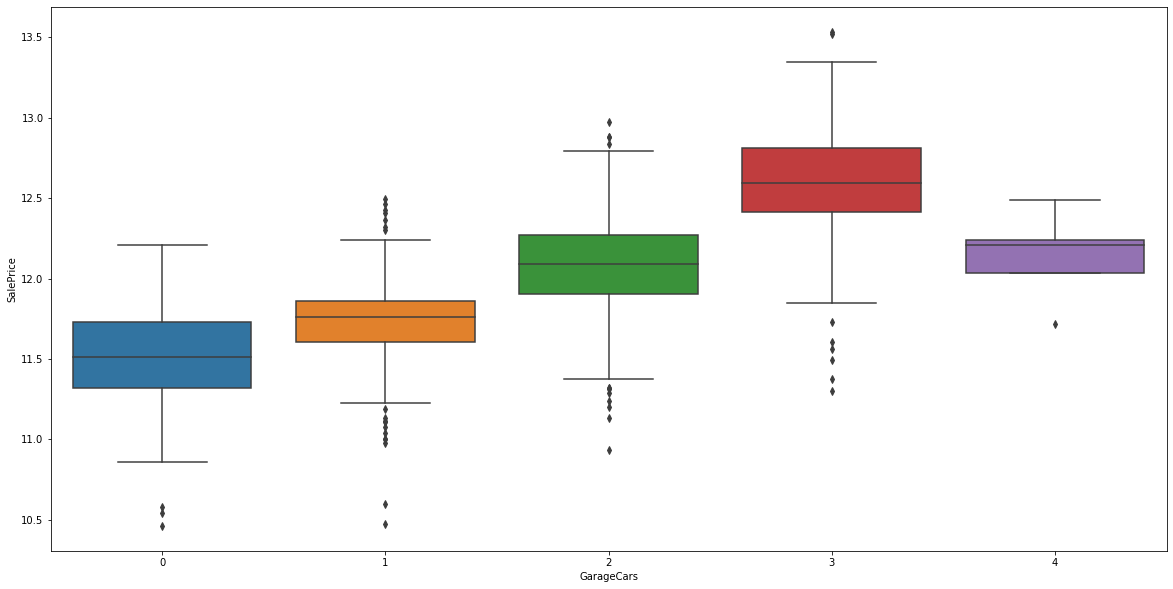

In [53]:
# garagecars와 saleprice = 0.681
plt.figure(figsize= (20, 10))
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = DF_OHE)
# 차고 수용면적이 클 수록 가격이 비싸지만, 4대를 수용할 수 있는 경우는 오히려 가격이 그리 높지 않은데,
# 집이 위치한 지역(도시 vs. 시골)에 따른 영향도 있을 것 같다. 

# 3. 모델 생성 & 평가

- MultivariateRegression
- XGBoost
- RandomForest



> ## 1) MultivariateRegression

In [55]:
%%time
from sklearn.linear_model import LinearRegression
MR = LinearRegression(normalize = True,
                      n_jobs = -1)
MR.fit(X_train, y_train)
# C = 0.9일 때 재현율이 가장 높다.

CPU times: user 61.2 ms, sys: 21.9 ms, total: 83.1 ms
Wall time: 64.7 ms


In [56]:
# RMSE
from sklearn.metrics import mean_squared_error
MR_rmse = np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))
MR_rmse

4506972195.053413

> ## 2) XGBoost

In [62]:
%%time
n_estimator = [1000, 2000]
learning_rate = [0.9, 0.8, 0.7]


for i in n_estimator:
  for j in learning_rate:
    parameter = (i, j)
    from xgboost import XGBRegressor
    XGB = XGBRegressor(booster = 'gblinear',
                     n_estimators = i,
                     learning_rate = j,
                     reg_lambda = 2.0,
                     n_jobs = -1)
    XGB.fit(X_train, y_train)
    XGB_rmse = np.sqrt(mean_squared_error(y_test, XGB.predict(X_test)))


    print("Parameter : {} , RMSE : {}".format(parameter, XGB_rmse))
    print('\n\n')
# n_estimator = 2000, learning_rate = 0.7에서 RMSE = 0.1438로 가장 낮다.

[05:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Parameter : (1000, 0.9) , RMSE : 0.14818478578703242



[05:56:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Parameter : (1000, 0.8) , RMSE : 0.14600800570941813



[05:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Parameter : (1000, 0.7) , RMSE : 0.14444448665757878



[05:56:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Parameter : (2000, 0.9) , RMSE : 0.14698801192057478



[05:56:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Parameter : (2000, 0.8) , RMSE : 0.14512232446804596



[05:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now

In [65]:
%%time
from xgboost import XGBRegressor
XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 2000,
                   learning_rate = 0.7,
                   reg_lambda = 2.0,
                   n_jobs = -1)
XGB.fit(X_train, y_train)
XGB_rmse = np.sqrt(mean_squared_error(y_test, XGB.predict(X_test)))
XGB_rmse

[06:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 10.4 s, sys: 19.3 ms, total: 10.4 s
Wall time: 5.26 s


> ## 3) RandomForestRegressor

In [63]:
%%time
est = [1000, 2000]
fea = [9, 10, 11]
dep = [3, 4]

for i in est:
  for j in fea:
    for k in dep:
      parameter = (i, j, k)
      from sklearn.ensemble import RandomForestRegressor
      RFR = RandomForestRegressor(
                            n_estimators = i,
                            max_features = j,
                            max_depth = k,
                            random_state = 2045,
                            n_jobs = -1)
      RFR.fit(X_train, y_train)
      RFR_rmse = np.sqrt(mean_squared_error(y_test, RFR.predict(X_test)))
      print("Parameter : {} , RMSE : {}".format(parameter, RFR_rmse))
      print('\n\n')
# n_estimators = 1000, max_features = 11, max_depth = 4일 때 RMSE : 0.1915로 가장 작다.

Parameter : (1000, 9, 3) , RMSE : 0.2211914638677141



Parameter : (1000, 9, 4) , RMSE : 0.1986955987608337



Parameter : (1000, 10, 3) , RMSE : 0.21848648067436213



Parameter : (1000, 10, 4) , RMSE : 0.19626234961225383



Parameter : (1000, 11, 3) , RMSE : 0.21353085953521733



Parameter : (1000, 11, 4) , RMSE : 0.1914875477591976



Parameter : (2000, 9, 3) , RMSE : 0.22270849501624804



Parameter : (2000, 9, 4) , RMSE : 0.19960416365543673



Parameter : (2000, 10, 3) , RMSE : 0.2186062651225918



Parameter : (2000, 10, 4) , RMSE : 0.19608351503963048



Parameter : (2000, 11, 3) , RMSE : 0.2140350623279466



Parameter : (2000, 11, 4) , RMSE : 0.19207870709098154



CPU times: user 39.7 s, sys: 4.64 s, total: 44.4 s
Wall time: 36 s


In [66]:
%%time
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 1000,
                            max_features = 11,
                            max_depth = 4,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)
RFR.fit(X_train, y_train)
RFR_rmse = np.sqrt(mean_squared_error(y_test, RFR.predict(X_test)))
RFR_rmse

CPU times: user 2.29 s, sys: 251 ms, total: 2.54 s
Wall time: 2.06 s


###  (1) Feature Importance

In [89]:
a = RFR.feature_importances_

In [92]:
features = DF_OHE.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'KitchenQual_TA']]

KeyError: ignored

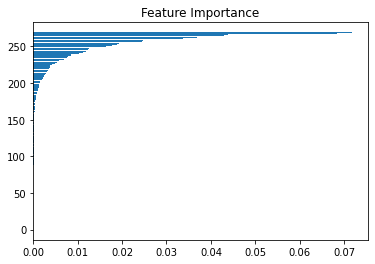

In [93]:
#features = DF_OHE.iloc[:,:-1]
indices = np.argsort(a)
plt.title('Feature Importance')
plt.barh(range(len(indices)), a[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 4. 결론

In [82]:
df_result = pd.DataFrame({"Model" : ['MR', 'XGB', 'RFR'],
                          "RMSE" : [MR_rmse, XGB_rmse, RFR_rmse]})
                          
df_result.sort_values(by=['RMSE'], axis=0, ascending=True)
# XGBoost 모델에서 가장 RMSE가 작다.

,Model,RMSE
1,XGB,1.438102e-01
2,RFR,1.914875e-01
0,MR,4.506972e+09


# 
# 
# 
# The End
# 
# 
# 